In [1]:
import babypandas as bpd
from scipy.stats import norm
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

# DSC 10 Discussion Week 8
---

# Confidence Intervals
---

Today, we'll be working on sampling and confidence intervals.

In [2]:
full_data = bpd.read_csv("Life Expectancy Data.csv")

In [3]:
full_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [4]:
recent_data = full_data[full_data.get("Year") == 2015]

In [5]:
recent_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
recent_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [7]:
# Let's visualize our population distribution.

# Defining a function to create bins easily
def get_bins(array, bin_size=1):
    """Create bins from the array with bin_size for each bin"""
    return np.arange(
        int(array.min()), int(array.max()) + 1 + bin_size, bin_size
    ) 

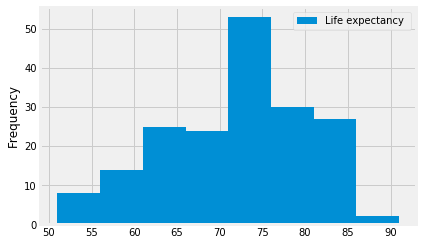

In [17]:
MEASURE = "Life expectancy "
bool_mask = recent_data.get(MEASURE) >= 0
data = recent_data[bool_mask] # This is just to remove nans
measured = data.get(MEASURE)
bins = get_bins(measured, 5) # <-- Try playing around with the bin size

data.plot(kind = "hist", y = MEASURE, bins=bins)

In [18]:
data.sort_values("Life expectancy ", ascending=False)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2345,Slovenia,2015,Developed,88.0,74.0,0,NaN,0.0,NaN,18,...,95.0,NaN,95.0,0.1,2729.863830,263531.0,1.4,1.3,0.888,17.3
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,...,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2
673,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,...,97.0,NaN,97.0,0.1,2375.112700,116985.0,1.0,1.0,0.854,14.3
544,Chile,2015,Developing,85.0,82.0,2,NaN,0.0,97.0,9,...,96.0,NaN,96.0,0.1,13653.226400,17762681.0,0.8,0.8,0.845,16.3
1314,Japan,2015,Developed,83.7,55.0,2,NaN,0.0,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
528,Chad,2015,Developing,53.1,356.0,46,NaN,0.0,46.0,418,...,52.0,NaN,46.0,2.8,777.248751,149413.0,8.5,8.4,0.394,7.3
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.0,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4


# This is our ... ? (Population or Sample Distribution)

```
??? Distribution
```

So, what is our aim?  We want to estimate the average life expectancy for the globe!  Let's say we don't have access to the entire population.  Let's say we can only collect data reliably from 20 countries.

As are standard procedures, we'll be creating a confidence interval around this estimate.  We can sample and use bootstrapping to find this.

In [19]:
# How do we create a representative sample?
collected = data.sample(20, replace = False)

In [20]:
collected

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1218,Iran (Islamic Republic of),2015,Developing,75.5,83.0,18,NaN,0.0,98.0,615,...,98.0,NaN,98.0,0.1,NaN,NaN,8.5,8.6,0.774,14.8
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
1538,Luxembourg,2015,Developed,82.0,63.0,0,NaN,0.0,94.0,0,...,99.0,NaN,99.0,0.1,1199.822300,56964.0,1.0,0.9,0.896,13.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
898,Fiji,2015,Developing,69.9,188.0,0,NaN,0.0,99.0,0,...,99.0,NaN,99.0,0.1,4921.896290,892149.0,4.0,3.7,0.734,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Philippines,2015,Developing,68.5,211.0,52,NaN,0.0,6.0,619,...,79.0,NaN,6.0,0.1,2878.338370,11716359.0,1.0,9.7,0.679,11.7
1042,Grenada,2015,Developing,73.6,142.0,0,NaN,0.0,92.0,0,...,99.0,NaN,92.0,0.1,9212.192824,NaN,3.8,3.8,0.751,15.8
978,Georgia,2015,Developing,74.4,129.0,1,NaN,0.0,94.0,431,...,91.0,NaN,94.0,0.1,3764.649120,37171.0,2.7,2.8,0.768,13.9
1298,Jamaica,2015,Developing,76.2,125.0,1,NaN,0.0,91.0,0,...,91.0,NaN,91.0,0.5,4965.989857,2871934.0,1.8,1.7,0.729,12.8


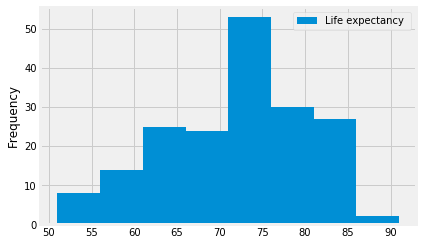

In [21]:
data.plot(kind = "hist", y = MEASURE, bins=bins)

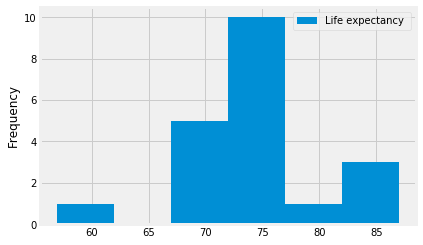

In [22]:
collected.plot(kind = "hist", y = MEASURE, bins=get_bins(collected.get(MEASURE), 5))

# This is our ...? (Sample or Population Distribution)

```
... DISTRIBUTION
```

We're interested in estimating the mean life expectancy.  So, let's find the mean of our sample.

In [23]:
sample_mean = collected.get(MEASURE).mean()
sample_mean

73.86

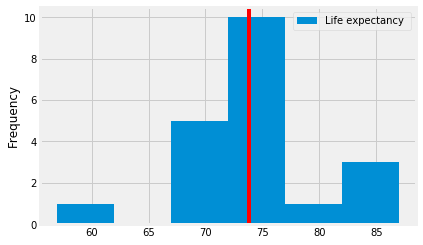

In [24]:
# We can show our mean in relation to the sample.
collected.plot(kind = "hist", y = MEASURE, bins=get_bins(collected.get(MEASURE), 5))
plt.axvline(sample_mean, c='r');

What happens when we resample?

The resampled mean is:		 73.205 
Compared to the original:	 73.86


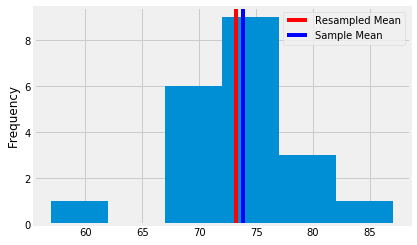

In [25]:
# Run this multiple time to see what changes.

resampled = collected.sample(collected.shape[0], replace = True)
resampled_mean = resampled.get(MEASURE).mean()

print("The resampled mean is:\t\t", resampled_mean, "\nCompared to the original:\t", sample_mean)

resampled.plot(kind = "hist", y = MEASURE, bins=get_bins(collected.get(MEASURE),5))
plt.axvline(resampled_mean, c='r')
plt.axvline(sample_mean, c='b')
plt.legend(["Resampled Mean","Sample Mean"]);

# What do the red and blue lines represent again?

```
What is the difference between the initial sample and the resamples?
```

Now, let's run the bootstrap so we can create our confidence interval!

0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 

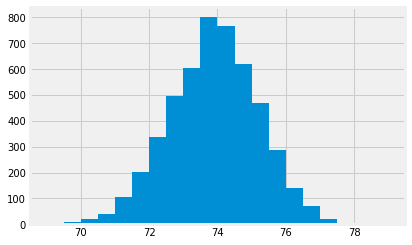

In [26]:
sample_means = np.array([])

for i in range(5_000):
    if i % 200 == 0: print(i, end = ', ')
    bootstrapped = collected.sample(collected.shape[0], replace = True)
    boot_mean = bootstrapped.get(MEASURE).mean()
    sample_means = np.append(sample_means, boot_mean)

plt.hist(sample_means, bins=get_bins(sample_means, 0.5));

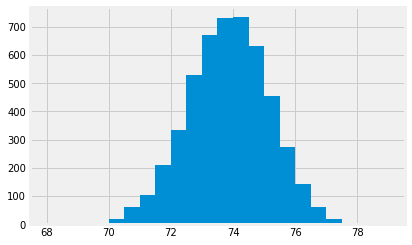

In [29]:
# Fast version!
bootstrap_count = 5_000
n = collected.shape[0]
life_exp = collected.get(MEASURE)
sample_means = np.array([life_exp.iloc[np.random.choice(n, size = n)].mean() for i in range(bootstrap_count)])

plt.hist(sample_means, bins=get_bins(sample_means, 0.5));

# What does this graph represent?

```
DISTRIBUTION OF RESAMPLED MEANS
```

Recall, the confidence interval uses percentiles as the bounds.

In [32]:
# First, we choose a confidence level.
confidence_level = 95
 
# What is the mean we're estimating?
mean = sample_means.mean()

# And then our lower and upper bounds?
# Let's try to find a way to calculate them regardless of our confidence level.
low = (100 - confidence_level) / 2
high = confidence_level + (100 - confidence_level) / 2
print("Percentages Low {}, High {}".format(low, high))
lower_bound = np.percentile(sample_means, low)
upper_bound = np.percentile(sample_means, high)

# Printing it out so we can easily see our results.
print("""
Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t{}%
""".format(mean, lower_bound, upper_bound, confidence_level))

Percentages Low 2.5, High 97.5

Mean:	73.85385600000001

Lower:	71.194625
Upper:	76.29999999999998

Level:	95%



Out of curiosity... what's the difference between our bounds and the mean?

In [33]:
abs(mean-lower_bound)

2.6592310000000055

In [34]:
abs(mean-upper_bound)

2.4461439999999754

# How do we interpret this confidence interval?
---

# Let's get a feel for how the distribution of sample means arises
---

We'll take a bunch of resamples and visualize the distribution as the number of resamples increases.

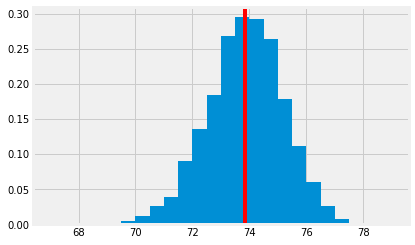

Resamples:	 5000


In [38]:
trials = 5_000

sample_means = np.array([])
update_var = 1

for i in range(trials):
    bootstrapped = collected.sample(collected.shape[0], replace = True)
    boot_mean = bootstrapped.get(MEASURE).mean()
    sample_means = np.append(sample_means, boot_mean)
    
    # Update the plot every once in a while (more frequently at lower values)
    if i >= update_var - 1 or i == trials - 1: # or at the last trial
        update_var *= 1.25
        clear_output(wait=True)
        # The distribution of sample means
        plt.hist(sample_means, density=True, bins=get_bins(sample_means, 0.5))
        # The mean value of the sample means
        plt.axvline(np.mean(sample_means), c='r')
        # Using the plt.pause method for basic animation
        plt.pause(0.01)
        print("Resamples:\t",i + 1)

# A bit of recap
---

Let's draw some things on the chalkboard.

- Our **POPULATION DISTRIBUTION** is unknown, and can be any shape.


- A **SAMPLE DISTRIBUTION** should have a shape roughly similar to the population distribution.  
(provided that the sample was large enough and was properly randomized)


- A **SAMPLE MEAN** is just the mean of that sample distribution.


- We can collect a handful of sample means (or fake it by bootstrapping)


- The **DISTRIBUTION OF SAMPLE MEANS** will resemble a normal distribution as the number of sample means increases. (Law of Large Numbers)


- The **CENTER/MEAN** of the distribution of sample means should be similar to the true population mean.  
(provided that our original sample was proper)

In [39]:
# Let's try this out on another column to see if the above claims hold!

# What if I told you there's another way?
---

Since we know that a normal distribution will arise as the number of resamples increases, then do we really need to go through all the effort of running a bootstrap?

Instead, we can rely on what we know about normal distributions!  The two defining features of a normal distribution are its center/mean and it's spread/standard deviation.

So, what's the standard deviation of the normal distribution that arises? Let's find these values and plot the corresponding normal distribution.

(array([0.0024, 0.0036, 0.0088, 0.0224, 0.0408, 0.08  , 0.1308, 0.2236,
        0.2636, 0.2912, 0.3052, 0.2344, 0.1888, 0.1124, 0.0544, 0.0288,
        0.0072, 0.0012, 0.0004, 0.    ]),
 array([69. , 69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. ,
        74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5, 78. , 78.5, 79. ]),
 <a list of 20 Patch objects>)

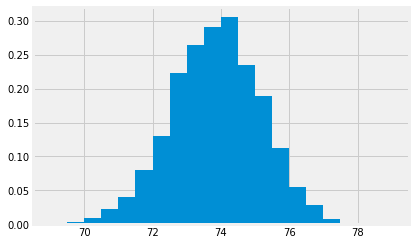

In [41]:
# # Running a bootstrap again to get the distribution
bootstrap_count = 5_000
n = collected.shape[0]
m = collected.get(MEASURE)
resampled_means = np.array([m.iloc[np.random.choice(n,n)].mean() for i in range(5_000)])
plt.hist(resampled_means, bins=get_bins(resampled_means, 0.5), density=True)

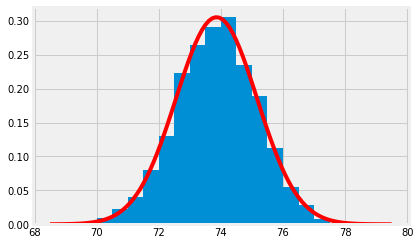

In [47]:
plt.hist(resampled_means, bins=get_bins(resampled_means, 0.5), density=True)
# Plotting a normal curve over the top of it.
mean = collected.get(MEASURE).mean() # The mean should be ..?
# Let's figure out what the standard deviation of the sample means should be!
std = np.std(collected.get(MEASURE)) / np.sqrt(collected.shape[0])
# Well, it SHOULD be the population SD / sqrt(Sample Size)
# but we can't access the population sd!  So, we use the sample sd instead.
x = np.linspace(*plt.xlim(), 100)
plt.plot(x, norm.pdf(x, mean, std), c='r');

So, we can create our CI mathematically instead of running the bootstrap.

For our normal curve, we'll have:
$$Mean = Sample\ Mean$$ 

$$Standard\ Deviation\ of\ Sample\ Means = \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

We have a distribution of different sample mean values as above.

As we get more and more sample means, the mean of their distribution will approach the true population mean.

The standard deviation of this distribution will keep on decreasing.

Let's use the normal curve we constructed above.

Now that we have a normal curve with a mean and standard deviation, how do we find the confidence interval from before?

In [74]:
# We know that 95% of data is within 1.96 standard deviations of
# the mean of a normal distribution.

# Sample mean (20 countries)
mean = collected.get(MEASURE).mean()

# What's the SD of the distrib. of sample means again?
std = np.std(collected.get(MEASURE)) / np.sqrt(collected.shape[0])

percent_95_limit = 1.96 # 95% of the area under the normal dist. is within 1.96 std of the mean

lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

print("""
Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t95%
""".format(mean, lower_bound, upper_bound))


Mean:	73.86

Lower:	71.29875167310938
Upper:	76.42124832689062

Level:	95%



Just like before, I'm curious to see the difference between our bounds and mean.

In [75]:
mean-lower_bound

2.5612483268906203

In [76]:
upper_bound-mean

2.5612483268906203

In [77]:
# How close were we to our bootstrap confidence interval?

```
very close
```

### What happens if we decrease/increase the number of resamples?

```
Less / More?
decrease: less/more like mathmatically calculated lower and upper bounds
increase: less/more like mathmatically calculated lower and upper bounds
```

Cool!  Now, since we do have the *"population"* that we're estimating, let's check the validity of our confidence interval.

In [78]:
# What was the population mean?
pop_mean = data.get(MEASURE).mean()
pop_mean

71.61693989071036

In [79]:
# Is the population mean inside of our interval?
lower_bound <= pop_mean <= upper_bound

True

# Interval widths
---

What if we think our interval size is too big?  How does our interval size change as other parameters change?

# Provided that we want to keep 95% level of confidence, how will we narrow our interval width?

In [ ]:
# BEFORE we answer that, let's think about one more thing:
#
# What is the width of our interval, in terms of our mean and standard deviation?


$$Interval\ Width = 4\cdot Sample\ Mean\ Standard\ Deviation$$
$$= 4\cdot \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

```
Decrease the sample deviation? Increase the sample size?
Can we decrease the sample deviation?
```

# Whats potentially wrong with what we've done above?

Our sample probably isn't big enough to be very reliable. There are almost 200 countries in the world, and each can have very unique characteristics. Remember that in the beginning we made an assumption. We assumed that the sample we took should be able to mostly represent the population distribution.

Therefore there may be very large variance in the population distribution. The sample size of 20 is around 10% of the. original dist. It may not be enough to represent all the countries. However, if we were working on something else, for example weight and height statistics in humans, than it could be appropriate.

- What happens if we can't tolerate a 5% chance of being wrong?

- If this is really important, we may want 99.7% confidence!

- What will happen to the width of our interval?

```
As we require more and more confidence, the width of the CI decreases / increases?
```

# What will our interval width be in term of mean and standard deviation?

To answer this, we need to know the "Empirical Rule".

For a normal distribution, we have approximately:

|# of SD away from mean|% of data contained in ± #SD|
|---|---|
|1|68%|
|2|95%|
|3|99.7%|

In [80]:
# So, we can calculate the CI if we need 99.7% confidence

mean = collected.get(MEASURE).mean()

std = np.std(collected.get(MEASURE)) / np.sqrt(collected.shape[0])

lower_bound_997 = mean - 3 * std
upper_bound_997 = mean + 3 * std

print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t99.7%
""".format(mean, lower_bound_997, upper_bound_997))


 Mean:	73.86

Lower:	69.9397219486368
Upper:	77.7802780513632

Level:	99.7%



In [81]:
# Let's look at the bounds for 95% versus 99.7% confidence
print("""
95% Lower:\t{0}\t99.7% Lower:\t{2}
95% Upper:\t{1}\t99.7% Upper:\t{3}
""".format(lower_bound, upper_bound, lower_bound_997, upper_bound_997))


95% Lower:	71.29875167310938	99.7% Lower:	69.9397219486368
95% Upper:	76.42124832689062	99.7% Upper:	77.7802780513632



### Question: Can we have a 100% confidence interval? If so when?

### It is easy for fully deterministic systems. You know everything already, there is no randomness.

### How about a random event? When can we have 100% confidence in a certain interval?